In [18]:
#'train.json' needs to be placed in the same file as this notebook
#the file is in the shared google drive, and can be found in the "NLVR2 train questions" folder

In [48]:

import json
import numpy as np

 
# Opening JSON file
f = 'train.json'
#f = open('../data/train.json',)
 
# returns JSON object as
# a dictionary]
lines = open(f).readlines()
examples = [json.loads(line) for line in lines]

 
# Iterating through the json
# list
sents = []
for i in examples:
    sents.append(i['sentence'])

In [49]:
#@title Load the Universal Sentence Encoder's TF Hub module
from absl import logging

import tensorflow as tf

import tensorflow_hub as hub
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import re
import seaborn as sns


In [71]:
#sent 2 vec
module_url = "https://tfhub.dev/google/universal-sentence-encoder/4" #@param ["https://tfhub.dev/google/universal-sentence-encoder/4", "https://tfhub.dev/google/universal-sentence-encoder-large/5"
model = hub.load(module_url)

message_embeddings = model(sents[:10000])
message_embeddings.shape


TensorShape([10000, 512])

Lower dim data has shape (10000, 2)


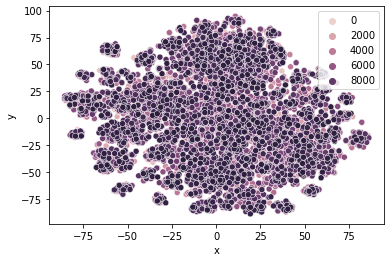

In [ ]:
from sklearn.manifold import TSNE
import pandas as pd
import seaborn as sns

model = TSNE(n_components=2)
low_dim_data = model.fit_transform(message_embeddings[:10000])
print('Lower dim data has shape',low_dim_data.shape)

tsne_df =  pd.DataFrame(low_dim_data)
tsne_df.columns = ['x','y']
tsne_df

ax = sns.scatterplot(data=tsne_df, x='x', y='y', hue=tsne_df.index)

In [ ]:
words = [sent.split() for sent in sents]

In [ ]:
def sent_from_word_embs(sent):
  model = word_model
  sent_words = sent.split()
  message_embeddings = model(sent_words[:10])
  np.mean(message_embeddings,axis = 0)
  return   np.mean(message_embeddings,axis = 0)

sent_from_word_embs(sents[0]).shape



(250,)

In [ ]:
#words 2 vec
module_url = "https://tfhub.dev/google/Wiki-words-250/2"
word_model = hub.load(module_url)

#message_embeddings = model(words[:10])
word_vecs = []
for sent in sents[:1000]:
  word_vecs.append(sent_from_word_embs(sent))
message_embeddings = np.vstack(word_vecs)


Lower dim data has shape (1000, 2)


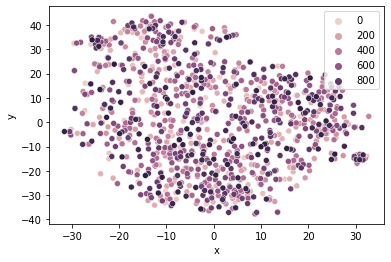

In [ ]:
model = TSNE(n_components=2)
low_dim_data = model.fit_transform(message_embeddings[:10000])
print('Lower dim data has shape',low_dim_data.shape)

tsne_df =  pd.DataFrame(low_dim_data)
tsne_df.columns = ['x','y']
tsne_df

ax = sns.scatterplot(data=tsne_df, x='x', y='y', hue=tsne_df.index)